# Assignment 2 (Exercise 6.15: The roots of a polynomial)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

Consider the sixth-order polynomial

$$
P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1
$$

There is no general formula for the roots of a sixth-order polynomial, but one can find them easily enough using
a computer.

In [17]:
def P(x):
    return 924 * x**6 - 2772 * x**5 + 3150 * x**4 - 1680 * x**3 + 420 * x**2 - 42 * x + 1

def dPdx(x):
    return 924 * 6 * x**5 - 2772 * 5 * x**4 + 3150 * 4 * x**3 - 1680 * 3 * x**2 + 420 * 2 * x - 42

2-1) Make a plot of $P(x)$ from $x = 0$ to $x = 1$ and by inspecting it find rough values for the six roots of the polynomial - the points at which the function is zero.

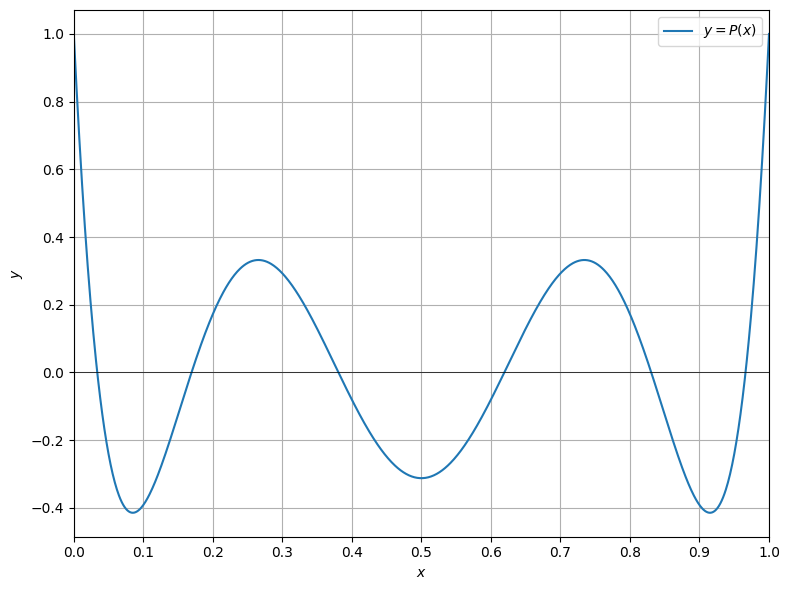

In [18]:
l, r = 0, 1
x = np.linspace(l, r, 1001)
N = 3

plt.figure(figsize=(8, 6))
y = P(x)
plt.plot(x, y, label=f'$y=P(x)$')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(l, r)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tight_layout()

plt.xticks(np.linspace(l, r, 11))

plt.grid()
plt.show()

2-2) (25 pts) Write a Python program to solve for the positions of all six roots to at least ten decimal places of accuracy, using Newton's method.

In [19]:
def newton_raphson(f, dfdx, x0, max_iterations=80, rtoi=1e-6, atoi=1e-6):
    for i in range(max_iterations):
        fx = f(x0)
        dfx = dfdx(x0)
        if dfx == 0:
            raise ZeroDivisionError(f"Zero derivative encountered at x = {x0}")
        dx = fx / dfx
        x_new = x0 - dx
        if abs(dx) < atoi + rtoi * abs(x_new):
            return x_new
        x0 = x_new
    raise ValueError(f"Newton-Raphson did not converge after {max_iterations} iterations")

In [20]:
x0s = [0.05, 0.15, 0.40, 0.60, 0.85, 0.95]
roots = []
for x0 in x0s:
    try:
        root = newton_raphson(P, dPdx, x0)
    except Exception as e:
        print(e)
    roots.append(root)
    
roots

[0.03376524289842399,
 0.16939530676684453,
 0.3806904069583867,
 0.6193095930416064,
 0.830604693233163,
 0.966234757101586]

Note that the polynomial in this example is just the sixth Legendre polynomial (mapped onto the interval from zero to one), so the calculation performed here is the same as finding the integration points for 6-point Gaussian quadrature (see Section 5.6.2), and indeed Newton's method is the method of choice for calculating Gaussian quadrature points.